In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot

In [9]:
IBM = pd.read_csv('IBM.csv', index_col='Date', parse_dates=True)
IBM

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363274,4261700
1,2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085762,4566100
2,2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309662,3212900
3,2022-10-06,124.879997,125.300003,121.769997,122.230003,114.035004,5074600
4,2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853622,4499700
5,2022-10-10,119.790001,119.959999,117.040001,117.750000,109.855377,5990000
6,2022-10-11,117.459999,119.230003,116.940002,117.800003,109.902016,4043100
7,2022-10-12,118.000000,118.809998,117.199997,117.570000,109.687424,3338800
8,2022-10-13,116.099998,122.150002,115.550003,121.790001,113.624489,5837500
9,2022-10-14,121.800003,122.540001,119.839996,120.040001,111.991837,3762400


In [ ]:
IBM['Close'].plot()

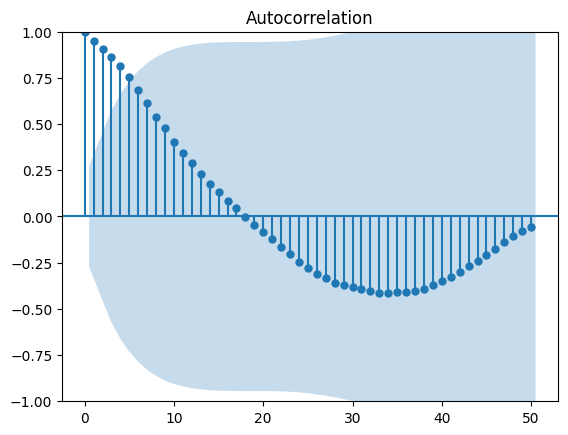

In [54]:
plot_acf(IBM['Close'], lags=50);

In [55]:
IBM['Diff1'] = IBM['Close'].diff()
IBM

,Open,High,Low,Close,Adj Close,Volume,Diff1
Date,,,,,,,
2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363274,4261700,NaN
2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085762,4566100,3.989998
2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309662,3212900,0.239998
2022-10-06,124.879997,125.300003,121.769997,122.230003,114.035004,5074600,-3.509995
2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853622,4499700,-3.410003
2022-10-10,119.790001,119.959999,117.040001,117.750000,109.855377,5990000,-1.070000
2022-10-11,117.459999,119.230003,116.940002,117.800003,109.902016,4043100,0.050003
2022-10-12,118.000000,118.809998,117.199997,117.570000,109.687424,3338800,-0.230003
2022-10-13,116.099998,122.150002,115.550003,121.790001,113.624489,5837500,4.220001


<Axes: xlabel='Date'>

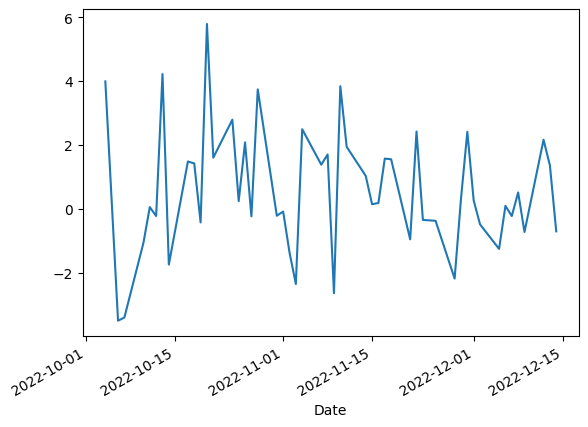

In [56]:
IBM['Diff1'].plot()

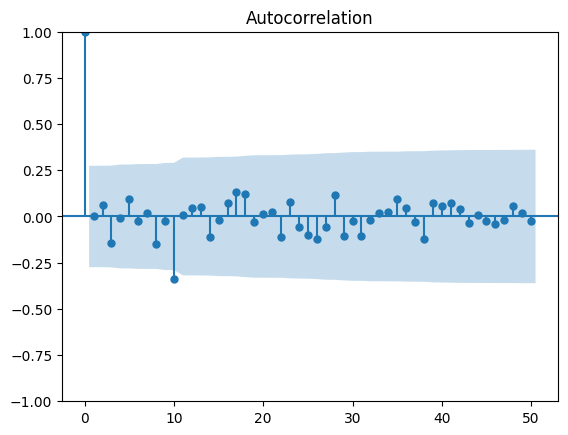

In [57]:
fig = plot_acf(IBM['Diff1'].dropna(), lags=50)

In [69]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

In [74]:
acorr_ljungbox(IBM['Close'],lags=[16],return_df=True)

,lb_stat,lb_pvalue
16,329.614929,1.820388e-60


In [75]:
acorr_ljungbox(IBM['Close'],lags=16,return_df=True)

,lb_stat,lb_pvalue
1,49.647329,1.840204e-12
2,95.709808,1.647705e-21
3,138.188973,9.288206e-30
4,176.923862,3.412791e-37
5,210.847023,1.355455e-43
6,239.542178,7.030766e-49
7,263.157367,4.372787e-53
8,281.815526,3.037164e-56
9,296.638981,1.347451e-58
10,307.566167,3.905240e-60


In [76]:
adfuller(IBM['Close'])

(-0.9398265150729507,
 0.7745742973095588,
 0,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 155.18453180208095)

In [77]:
kpss(IBM['Close'])

C:\Users\omord\AppData\Local\Temp\ipykernel_13376\1191317864.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(IBM['Close'])


(1.0473858523801467,
 0.01,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})